# Предсказание сердечнососудистых заболеваний


## Описание данных

**Есть 3 типа аттрибутов:**

Объективная характеристика: фактическая информация;

Рез. обследования: результаты медицинского обследования;

Субъективная харрактеристика : информация, предоставленная пациентом.

**Аттрибуты:**

Возраст | Объективная характеристика | возраст | int (дни)

Высота | Объективная характеристика | высота | int (см) |

Вес | Объективная характеристика | вес | float (кг) |

Пол | Объективная характеристика | пол | категориальный код |

Артериальное давление | Особенности экзамена | ap_hi | int |

Диастолическое артериальное давление | рез. обследования | ap_lo | int |

Холестерин | рез. обследования  | холестерин | 1: нормально, 2: выше нормы, 3: значительно выше нормы |

Глюкоза | рез. обследования | глюк | 1: нормально, 2: выше нормы, 3: значительно выше нормы |

Курение | Субъективная характеристика | дым | double |

Прием алкоголя | Субъективная характеристика | алкоголь | double |

Физическая активность | Субъективная особенность | активный | double |

Наличие или отсутствие сердечно-сосудистых заболеваний | Целевая переменная | кардио | bool |

Все значения набора данных были собраны во время медицинского осмотра.

## Задача

Предсказание налиция сердечнососудистого заболевания по данным результатов обследования и субъективных характеристик

Ссылка на данные https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

Импорт библиотек:

In [3]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

# 1. Загрузка данных

In [4]:
data_raw = pd.read_csv('./Datasets/cardio_train.csv',sep=';')
data_raw.shape

(70000, 13)

In [12]:
data_raw.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Имена аттрибутов:

In [13]:
data_raw.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

Определяем категории

In [5]:
data = data_raw.copy()

data['gender'] = data['gender'].replace([1,2],['male','female']) 
data['gender'] = data['gender'].astype('category')

pd.merge(data[['id','gender']],data_raw[['id','gender']], on='id')

,id,gender_x,gender_y
0,0,female,2
1,1,male,1
2,2,male,1
3,3,female,2
4,4,male,1
...,...,...,...
69995,99993,female,2
69996,99995,male,1
69997,99996,female,2
69998,99998,male,1


In [6]:
data['active'] = data['active'].astype('category')
data['smoke'] = data['smoke'].astype('category')
data['alco'] = data['alco'].astype('category')
data['cardio'] = data['cardio'].astype('category')

# 2. Визуализируем данные

In [103]:
data_raw.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.describe(include=['category'])

,gender,smoke,alco,active,cardio
count,70000,70000,70000,70000,70000
unique,2,2,2,2,2
top,male,0,0,1,0
freq,45530,63831,66236,56261,35021


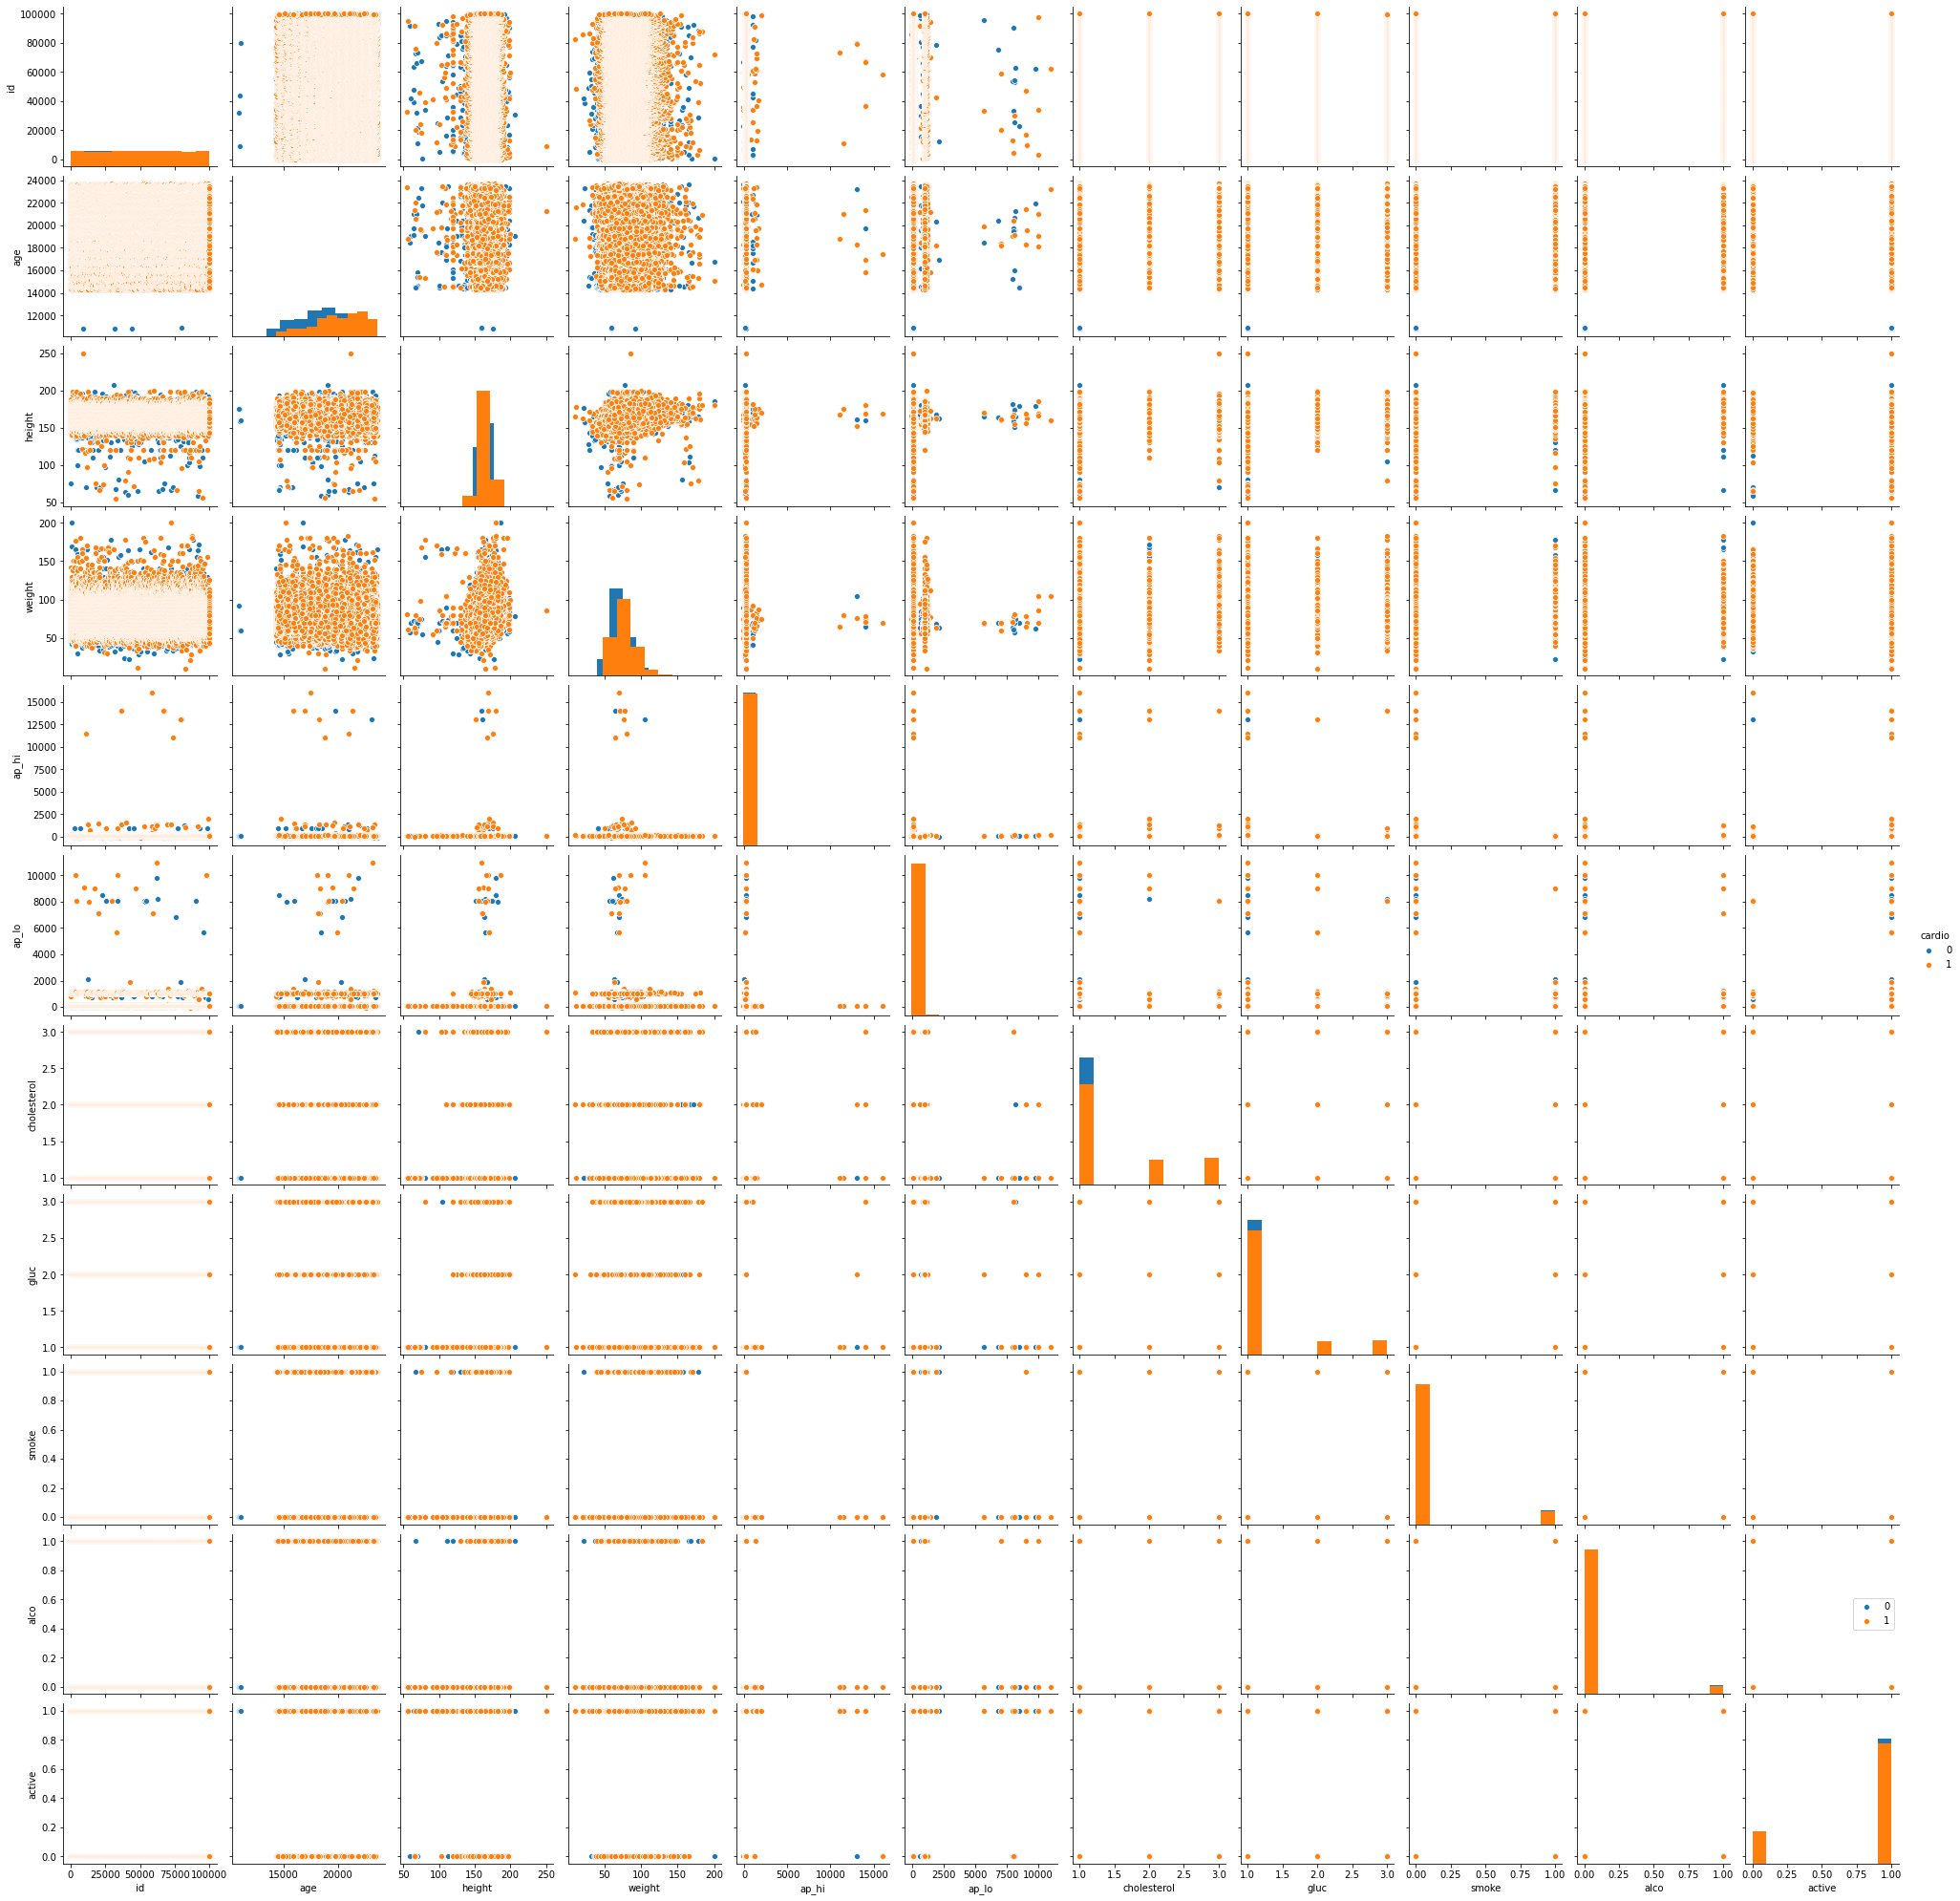

In [120]:
sns.pairplot(data, hue='cardio', diag_kind='hist')
plt.legend()
pass

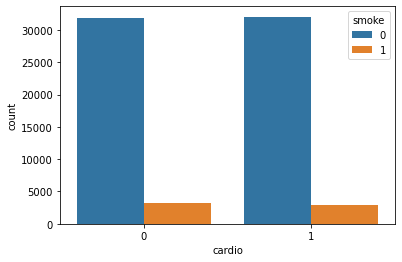

In [105]:
sns.countplot(x='cardio', order=data['cardio'].value_counts().index, hue='smoke', data=data)
pass

Зависимость наличия болезни в зависимости от возраста и верхнего давления. Большой кружок - актывный образ жизни. Как видно, имеется достаточное количество выбросов. Скорее всего, судя по поласам, разделяюще данные - в конец добавлены незначащие нули (1 или 2) 

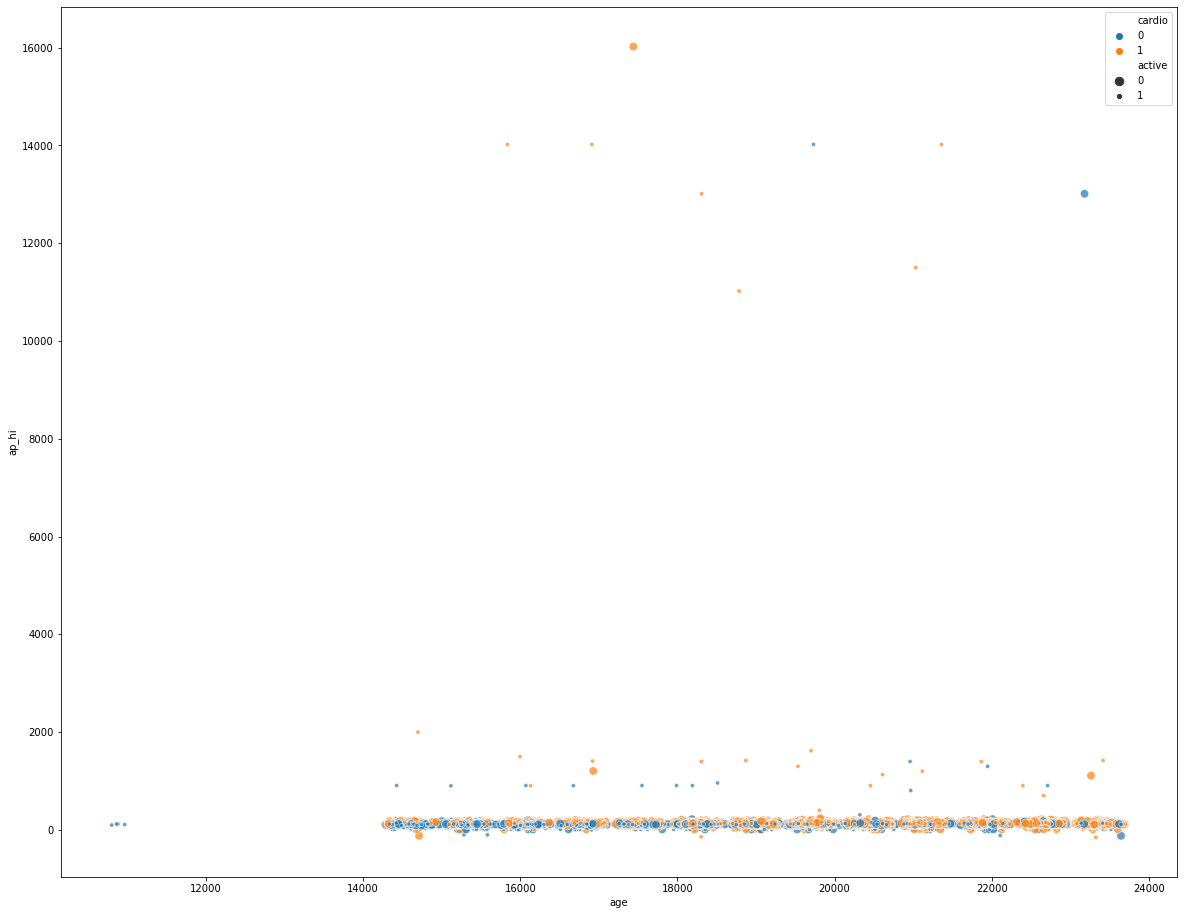

In [116]:
plt.figure(figsize = (20, 16))
np.random.seed(43)
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)

sns.scatterplot(x='age', y='ap_hi', size='active', hue='cardio', data=data, alpha=0.7)
pass

Зависимость верхнего давления от нижнего

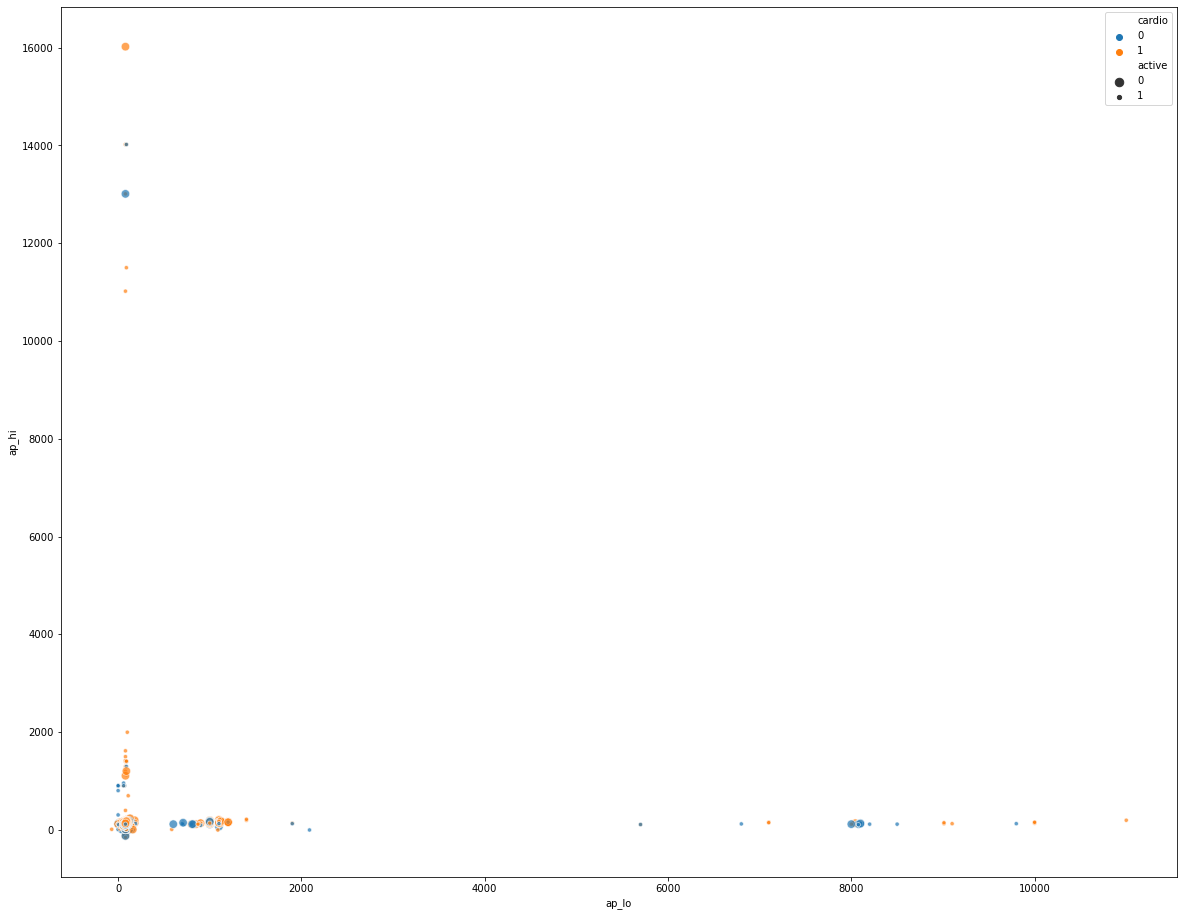

In [117]:
plt.figure(figsize = (20, 16))
np.random.seed(43)
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)

sns.scatterplot(x='ap_lo', y='ap_hi', size='active', hue='cardio', data=data, alpha=0.7)
pass

# 3. Исправление / удаление выбросов

 Делим значение уровня верхнего давления на 100 и на 10 в зависимости от его значения :

In [8]:
cdata = data.copy()
#cdata[data['ap_hi']  >= 10000,'ap_hi'] = cdata[data['ap_hi']  >= 10000,'ap_hi'].map(lambda x : x // 100) 
cdata.loc[cdata['ap_hi']  >= 10000,'ap_hi'] = cdata.loc[cdata['ap_hi']  >= 10000,'ap_hi'] // 100
cdata.loc[cdata['ap_hi']  >= 250,'ap_hi'] = cdata.loc[cdata['ap_hi']  >= 250,'ap_hi'] // 10

cdata.loc[data['ap_hi']  >= 250].sort_values(by='ap_hi')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
40330,57646,20322,male,162,50.0,30,0,1,1,0,0,1,0
40831,58349,19806,male,162,67.0,40,80,1,3,0,0,1,1
9557,13616,22659,male,155,87.0,70,110,1,1,0,0,1,1
41505,59301,20970,male,154,41.0,80,0,1,1,0,0,1,0
42397,60565,17988,female,176,69.0,90,0,1,1,0,0,1,0
31783,45400,16070,male,170,64.0,90,0,1,1,0,0,1,0
29665,42410,17548,male,154,65.0,90,70,1,1,0,0,1,0
42658,60948,20456,female,182,80.0,90,60,1,1,0,0,1,1
68663,98095,18190,male,156,41.0,90,0,1,1,0,0,1,0
1876,2654,15116,male,160,60.0,90,60,1,1,0,0,1,0


Рассмотрим нижнее давление

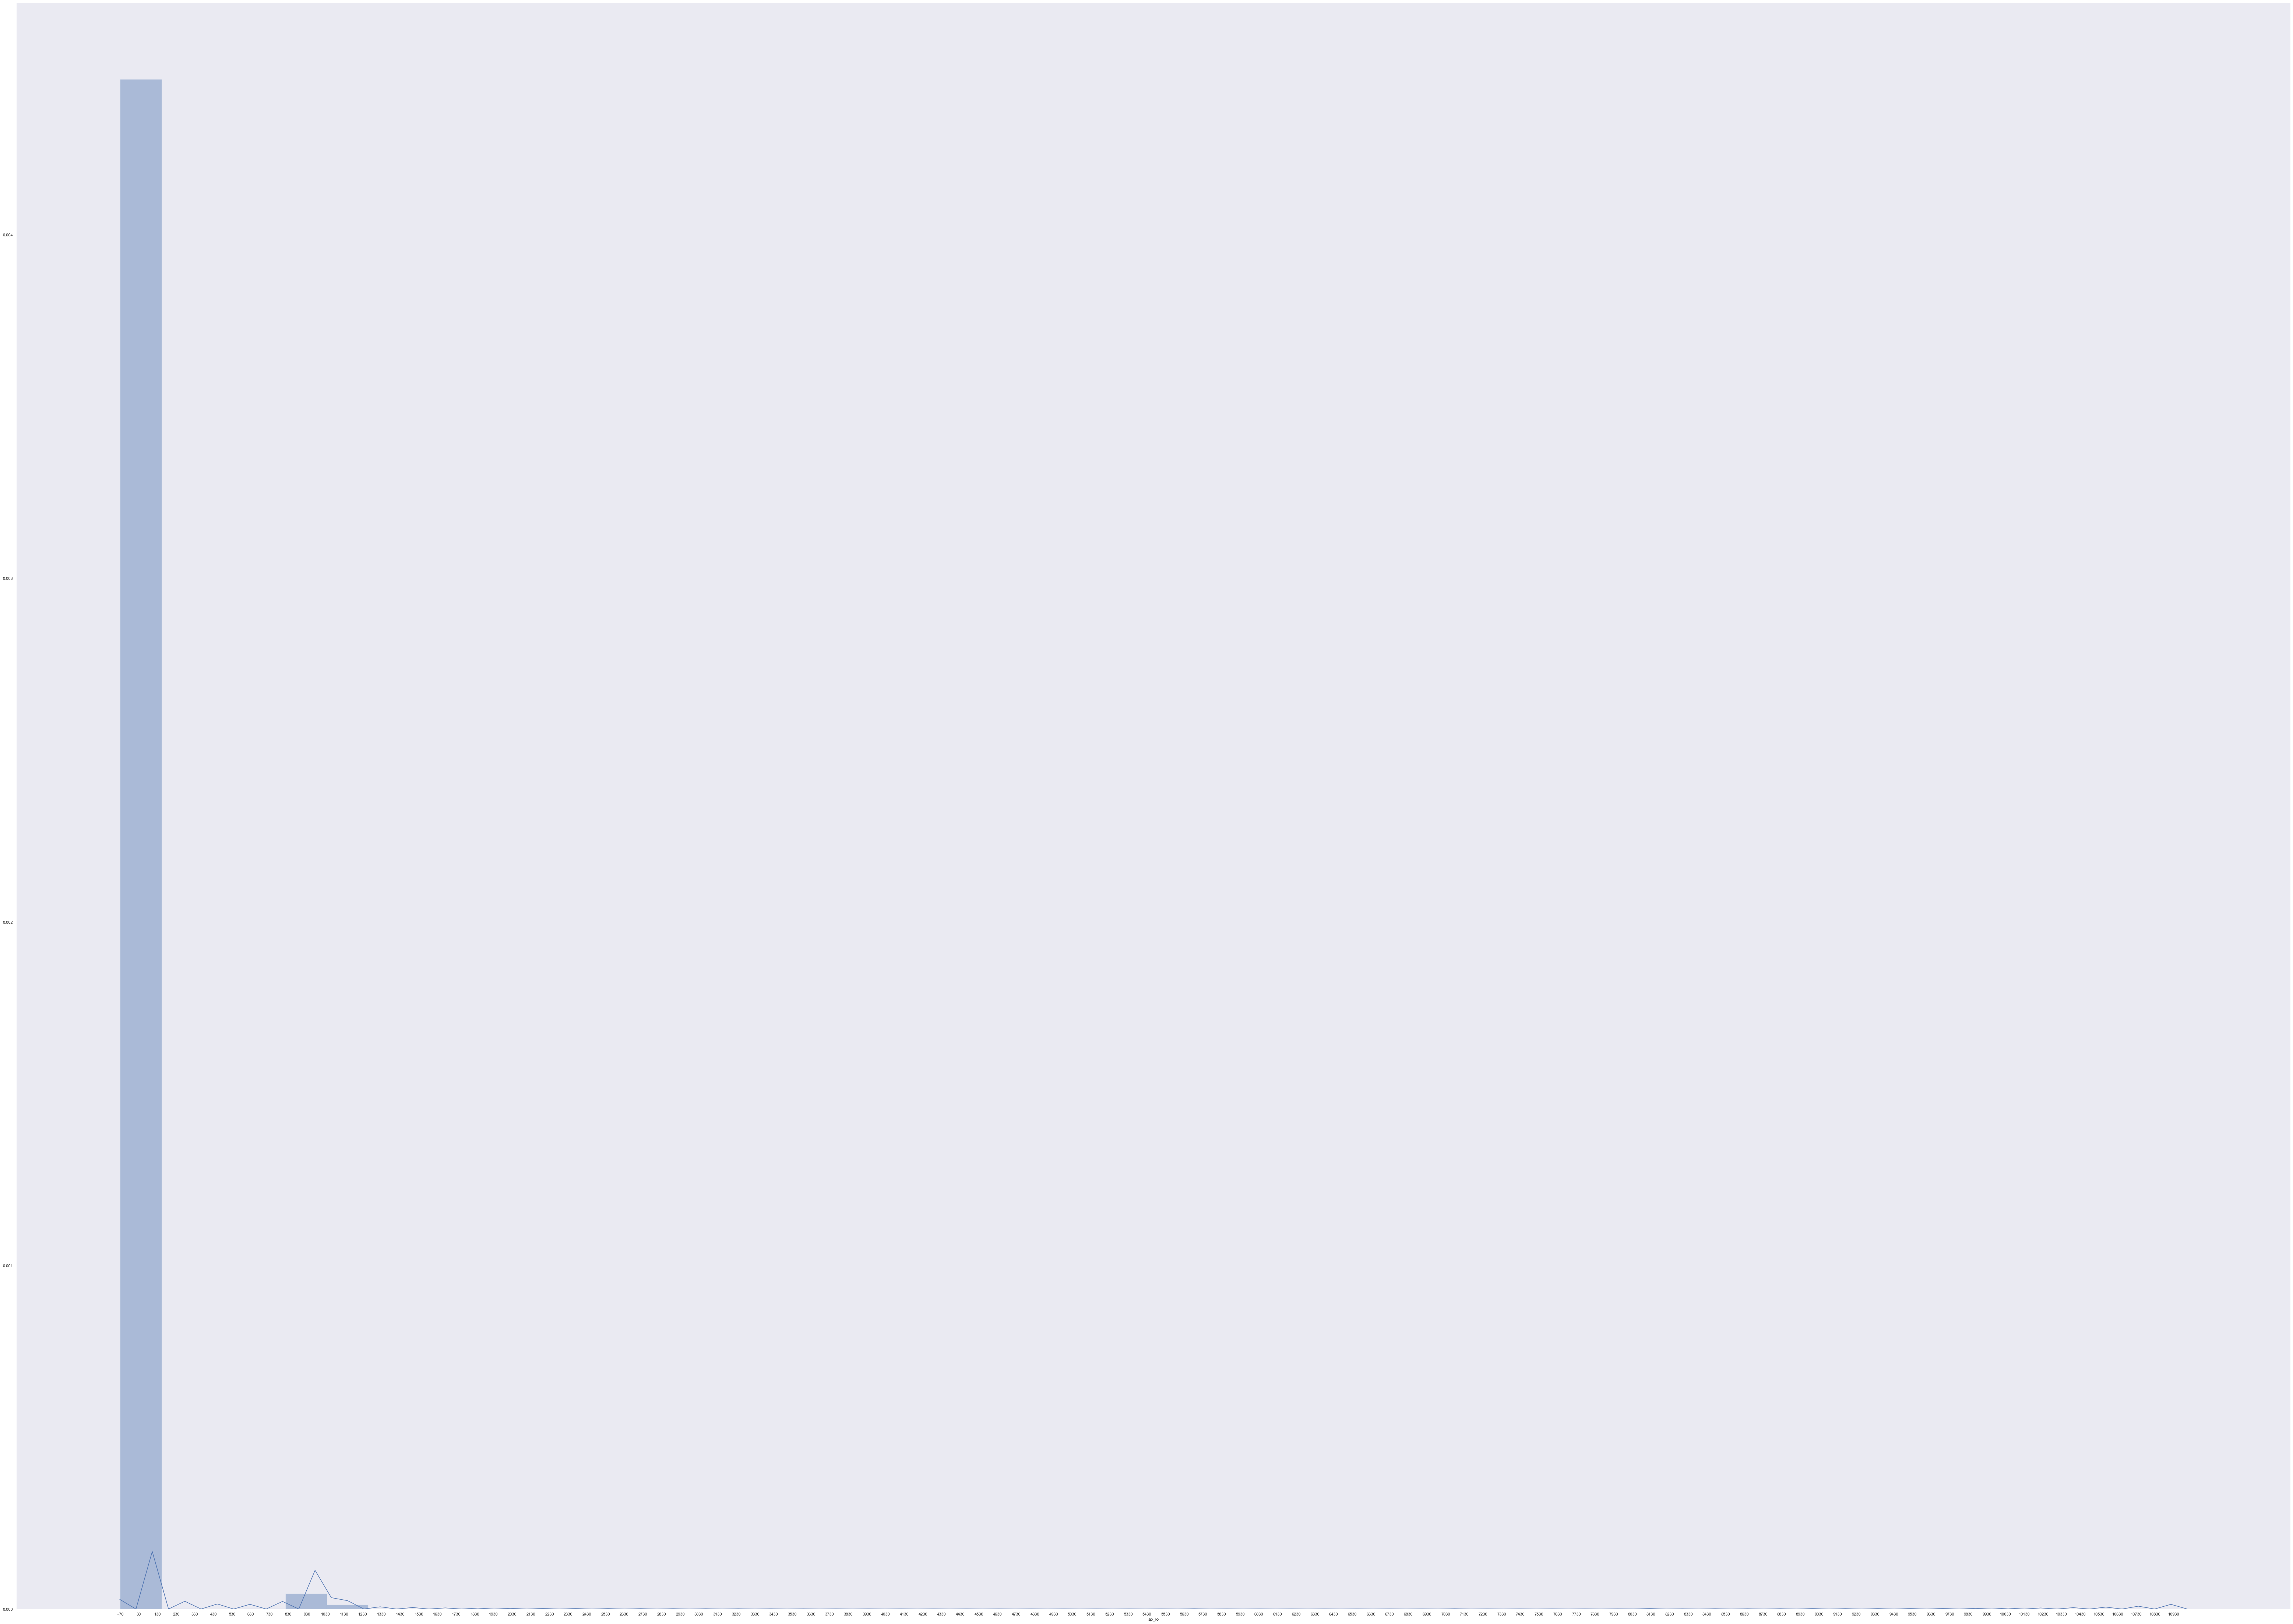

In [181]:
sns.set(rc={'figure.figsize':(110.7,80.27)})
sns.distplot(cdata['ap_lo'])
plt.xticks(np.arange(np.min(cdata['ap_lo']), np.max(cdata['ap_lo'])+1, 100.0))
plt.grid()

Имеется, кроме пика правильных значений, маленькие пики там, где даныые увеличины в 10 и в 100 раз. Обновляем Данные

In [9]:
cdata.loc[cdata['ap_lo'] > 1400,'ap_lo'] = cdata.loc[cdata['ap_lo']  > 1400,'ap_lo'] // 100
cdata.loc[cdata['ap_lo'] >  200,'ap_lo'] = cdata.loc[cdata['ap_lo']  >  200,'ap_lo'] // 10

#cdata.loc[data['ap_lo'] > 1400].sort_values(by='ap_lo')

Обновим отрицательные значения, теперь их величину можно интерпретировать 

In [10]:
cdata.loc[ (cdata['ap_lo'] < 0) | (cdata['ap_hi'] < 0),['ap_lo','ap_hi' ] ] = cdata.loc[ (cdata['ap_lo'] < 0) | (cdata['ap_hi'] < 0),['ap_lo','ap_hi']].applymap(lambda x: abs(x))
cdata.loc[ (data['ap_lo'] < 0) | (data['ap_hi'] < 0),['ap_lo','ap_hi' ] ]

,ap_lo,ap_hi
4607,80,100
16021,70,115
20536,70,100
23988,90,140
25240,80,120
35040,80,150
46627,80,120
60106,70,15


Удалим строки с заведомо малыми значениями давления

In [11]:
rows_to_drop =  cdata[(cdata['ap_lo'] < 10) | (cdata['ap_hi'] < 50)].index
cdata = cdata.drop(rows_to_drop)
cdata

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,female,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,male,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,male,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,female,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,male,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,female,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,male,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,female,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,male,163,72.0,135,80,1,2,0,0,0,1


Посмотрим на зависимость верхнего и нижнего давления без выбросов

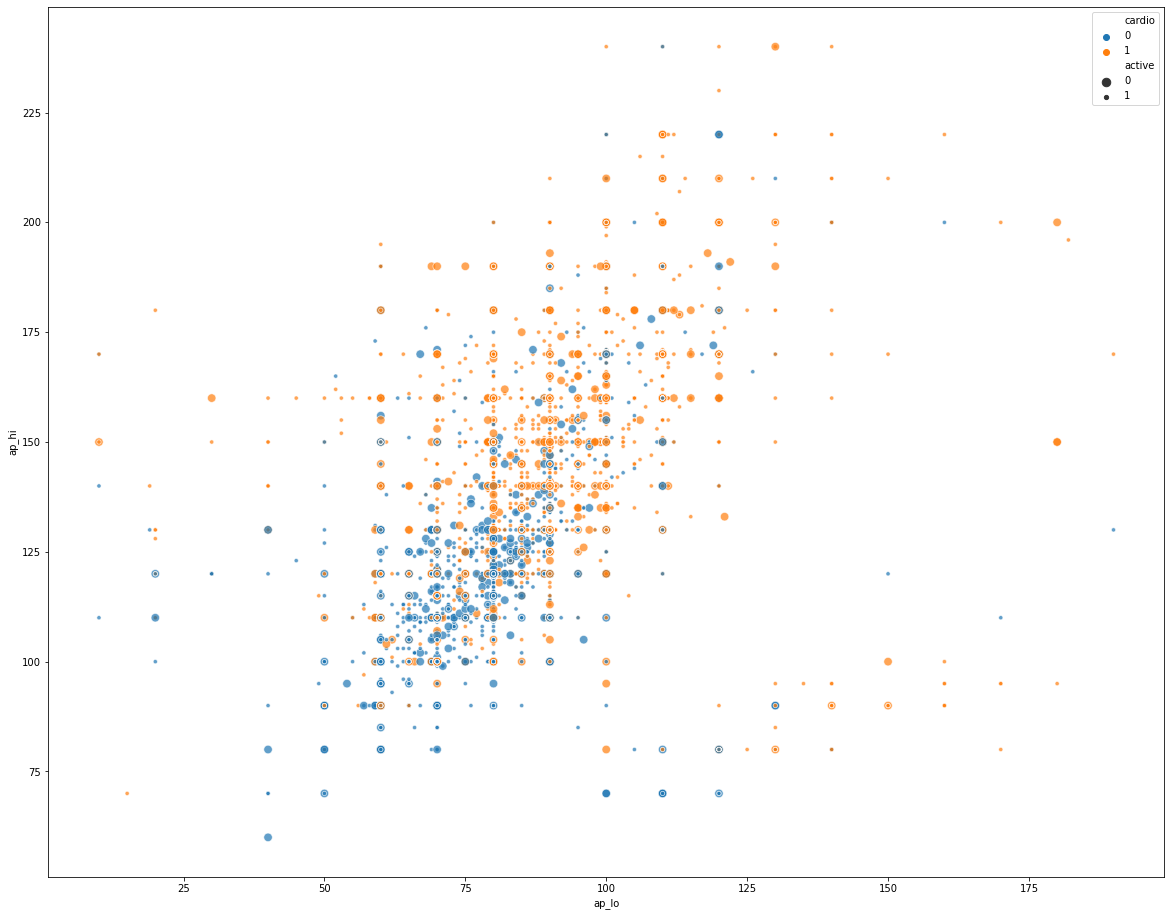

In [12]:
plt.figure(figsize = (20, 16))
np.random.seed(43)
random_subset = np.random.choice(np.arange(cdata.shape[0]), size=1000, replace=False)

sns.scatterplot(x='ap_lo', y='ap_hi', size='active', hue='cardio', data= cdata, alpha=0.7)
pass

Гораздо лучше! Теперь видима некоторая кореляция высокого давления и болезни. Нарисуем общую диаграму заново

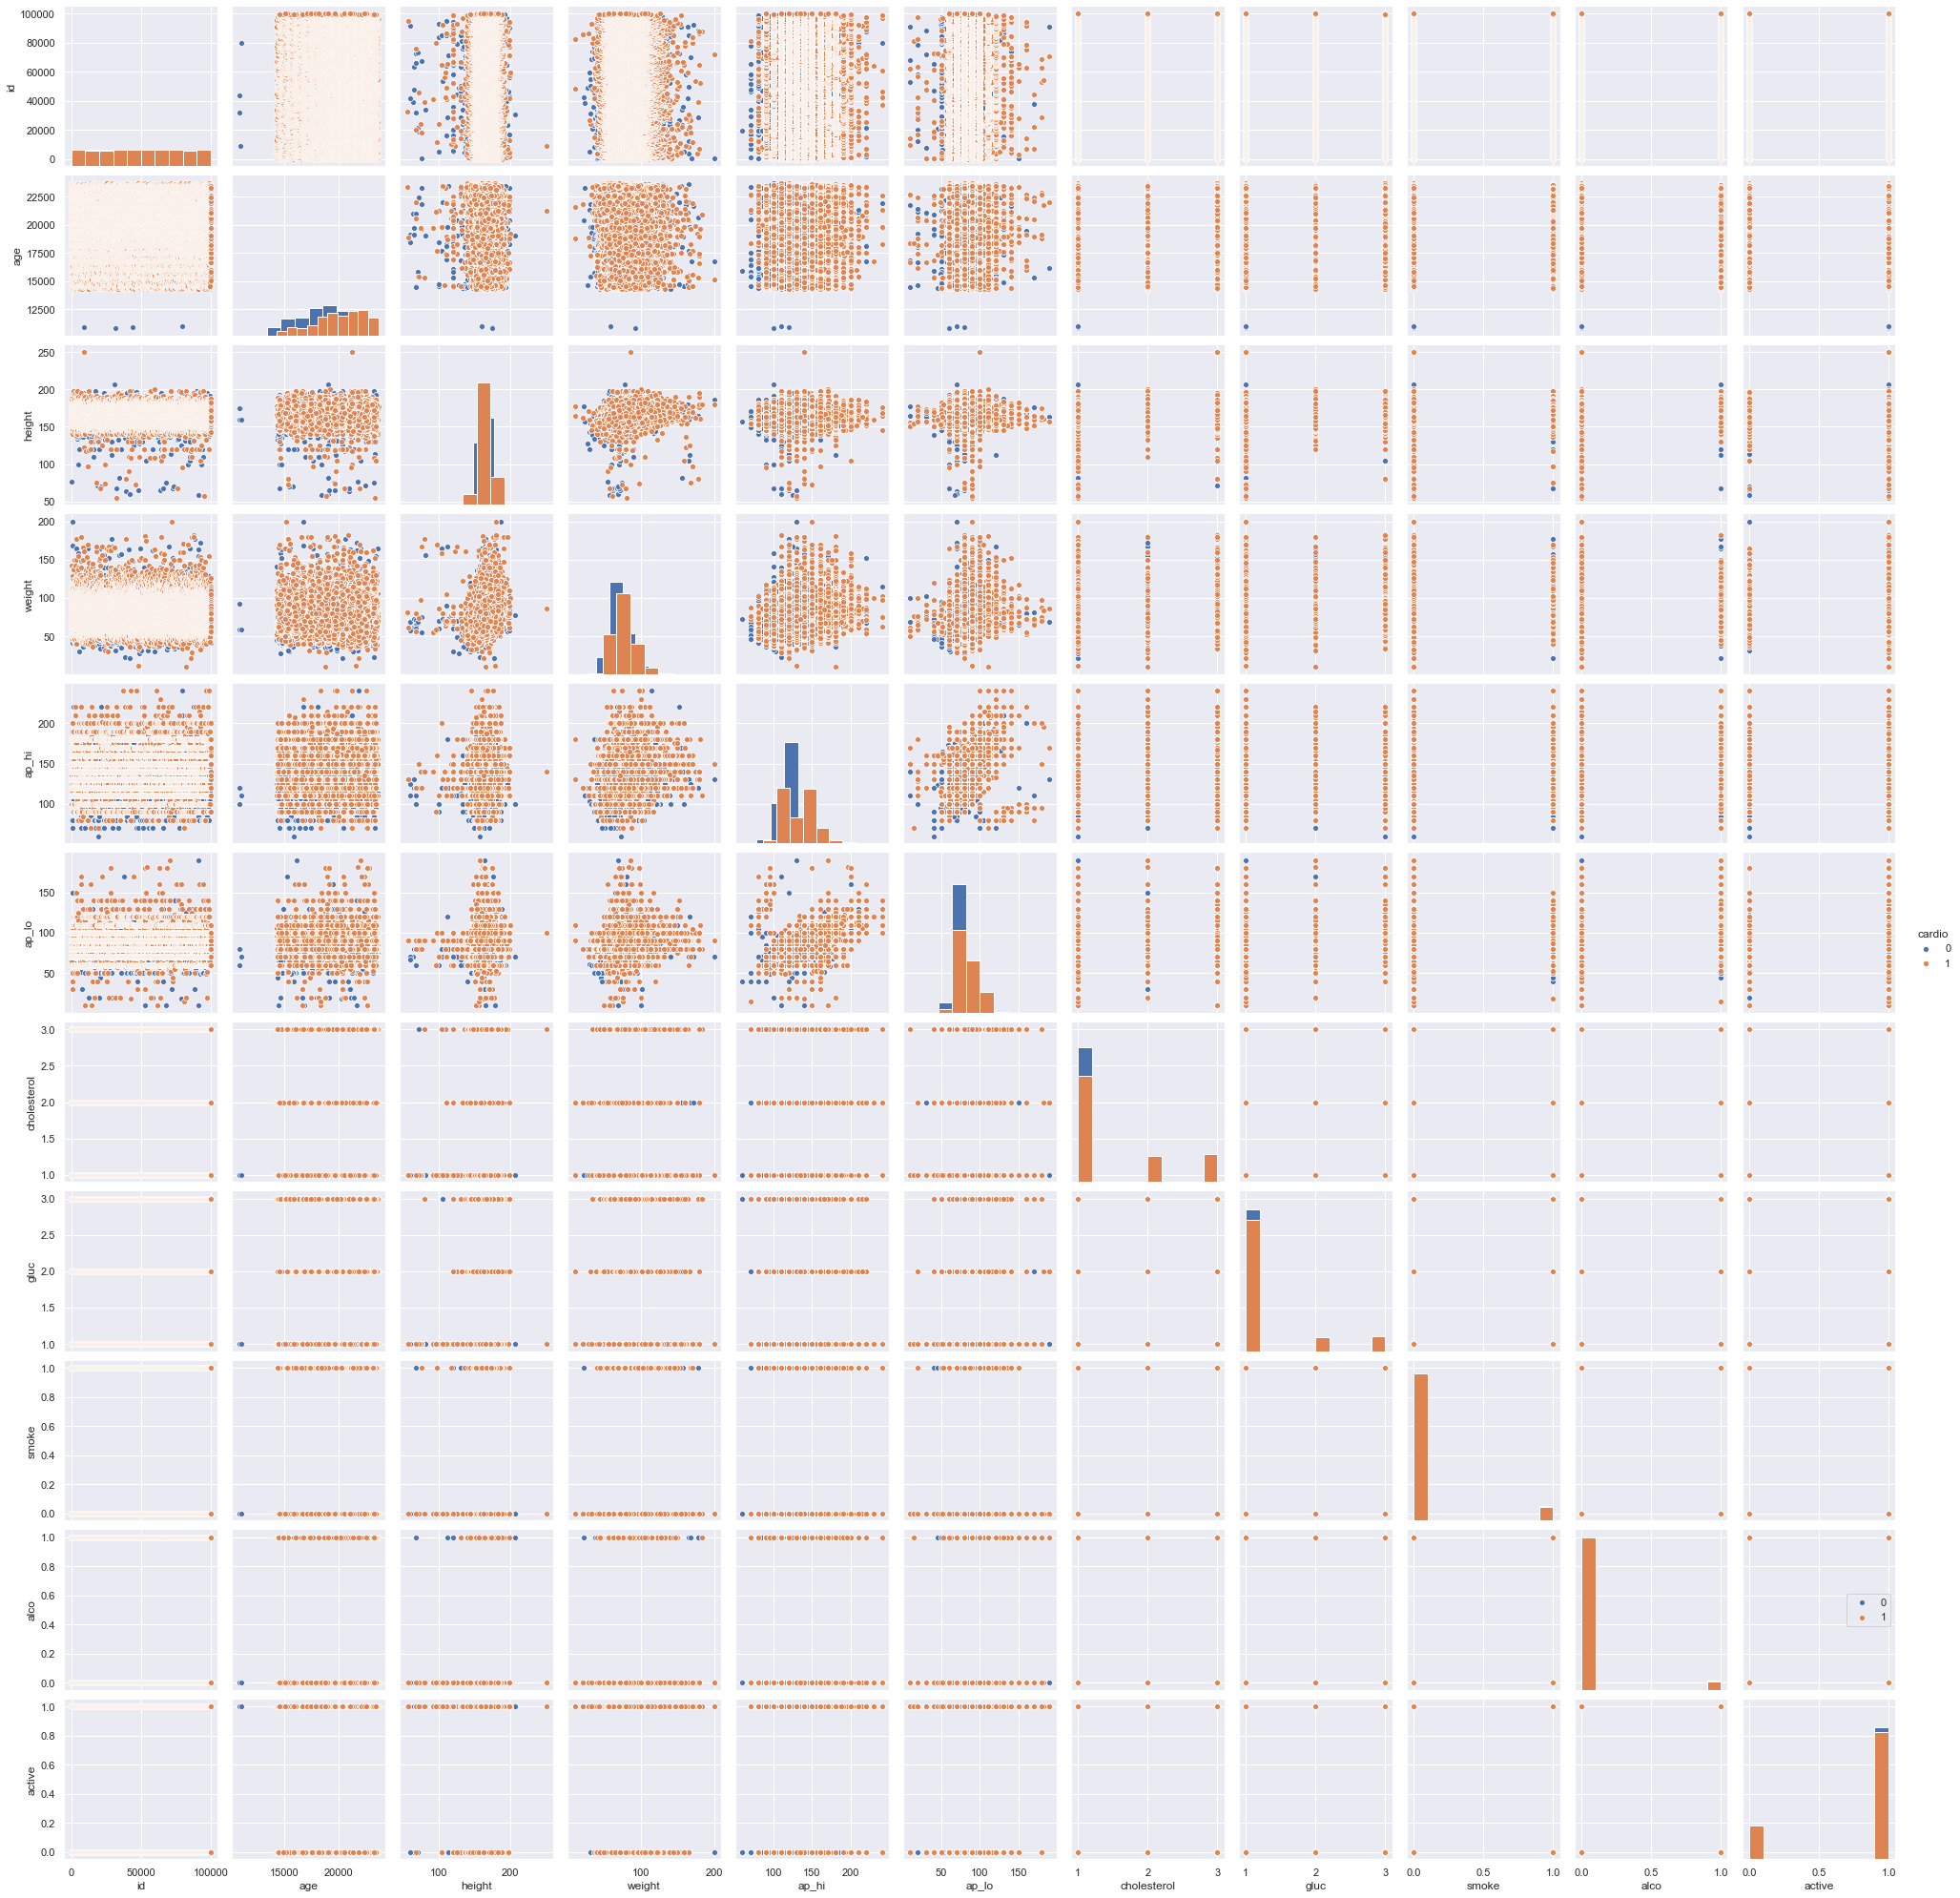

In [229]:
sns.pairplot( cdata, hue='cardio', diag_kind='hist')
plt.legend()
pass

Проверим квантили возразста

In [13]:
cdata['age'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995]) / 365

0.005    39.465753
0.010    39.632877
0.050    41.283562
0.100    43.402740
0.500    53.980822
0.900    62.024658
0.950    63.723288
0.990    64.353425
0.995    64.501370
Name: age, dtype: float64

Значения вполне допустимые

In [17]:
cdata.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

# 3. Визуализация 

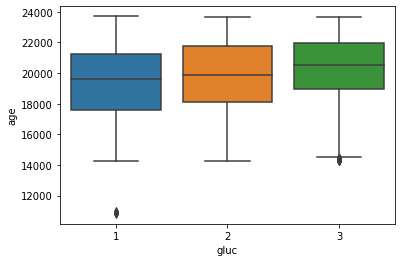

In [23]:
sns.boxplot(x="gluc", y="age", data=cdata)
pass